##The Website Phishing data contains 10 columns.
##Each column helps to identify if the website is legitimate(1), suspicious(0), phishy(-1).  
#Applying **Decision Tree** to classify whether a website is phishy or not.



In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('Website Phishing.csv')

In [4]:
df.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


Name and Meaning of Each Column

The columns in the dataframe represent different features related to phishing. The values associated with each one of the columns are described below:

1. SFH - Server Form Handler After the information is send the website sends them to a server to process the data. Phishy websites usuallu let the SFH field blank or redirects to another domain.

2. Pop up Window - Legitimate websites don't use pop up windows to validate users' information.

3. SSL final state - Reliable webpages use the HTTP protocol, on the other hand malicious websites may use a fake HTTP procotol or not use it at all.

4. Request URL - Malicious websites usually load the page content from a different URL than the original website URL.

5. URL of anchor - Malicious websites usually have links that point to different webpages.

6. Web traffic - Legitimate websites usually have a lower number of visits than the malicious ones. 

7. URL length - URLs with length bigger than 75 characters are considered features from phishy websites.

8. Age of domain - Websites with less than a year of existece are considered suspicious 

9. Having IP Address - The presence of IP address in the website URL is associated with malicious websites.

In [5]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [6]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  702
Count of Suspicious Websites =  103
Count of Phishy Websites =  548


Exploring Data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0516b0b7b8>,
      dtype=object)

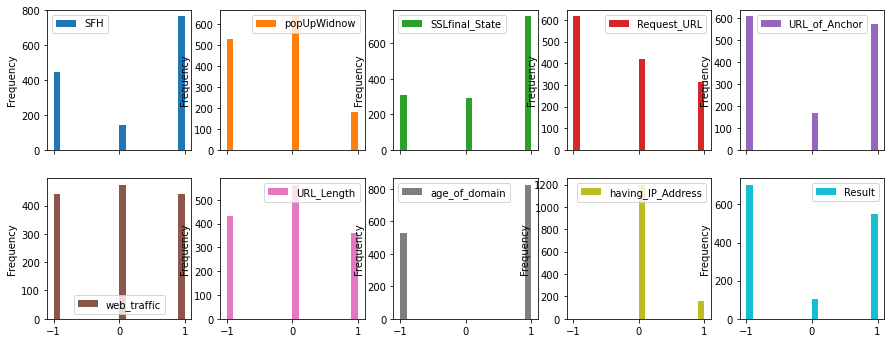

In [8]:
df.plot.hist(subplots=True, layout=(5,5), figsize=(15, 15), bins=20)

In [9]:
#Correlation Matrix
df.corr()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


Model Training

In [15]:
x = df.drop('Result',axis=1).values 
y = df['Result'].values

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=10)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 811 samples.
Testing set has 542 samples.


In [23]:
from sklearn import tree

In [25]:
model_tree = tree.DecisionTreeClassifier()
model = model_tree.fit(x_train, y_train)

In [44]:
features = ('SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',	'web_traffic',	'URL_Length',	'age_of_domain',	'having_IP_Address')
name = ('Phishing', 'Suspicious', 'Legitimate')

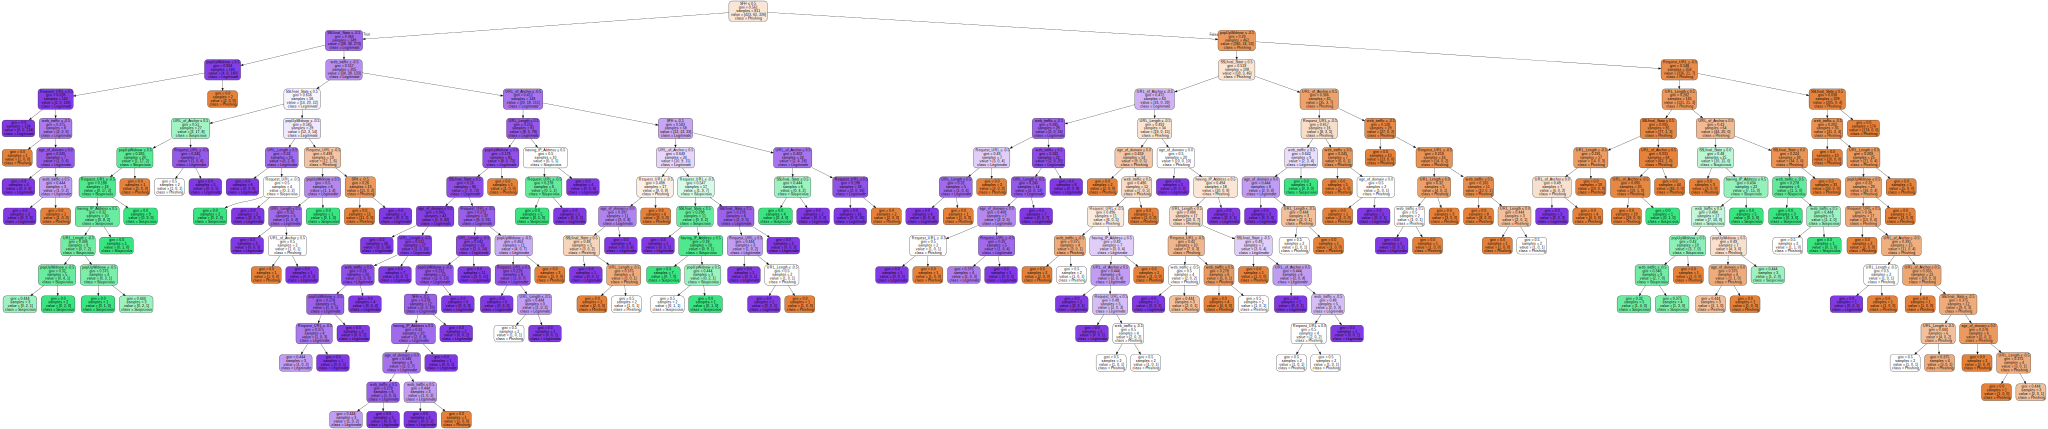

In [45]:
#Decision Tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names = features, class_names =  name,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Model Testing

In [47]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
 
#Test the model using testing data
predictions = model.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predictions)

array([[256,   0,  23],
       [  8,  32,   1],
       [ 22,   9, 191]])

In [53]:
print("f1 score is ",f1_score(y_test,predictions,average='weighted'))
print("The accuracy of Decision Tree Algorithm on testing data is: ",100.0 *accuracy_score(y_test,predictions))

f1 score is  0.8835568545232038
The accuracy of Decision Tree Algorithm on testing data is:  88.37638376383764
